In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import patches
import xarray as xr
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
import pandas as pd

In [3]:
data_set = scipy.io.readsav('../src/final_data_all.save',verbose = True,python_dict=True)

--------------------------------------------------
Date: Thu Aug 15 12:54:47 2019
User: elandi
Host: srbwks2017-0037.engin.umich.edu
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 14 records of which:
 - 1 are of type VERSION
 - 11 are of type VARIABLE
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - wvl [<class 'numpy.ndarray'>]
 - final_disk [<class 'numpy.ndarray'>]
 - final_limb [<class 'numpy.ndarray'>]
 - r_disk [<class 'numpy.ndarray'>]
 - dr_disk [<class 'numpy.ndarray'>]
 - r_limb [<class 'numpy.ndarray'>]
 - dr_limb [<class 'numpy.ndarray'>]
 - rsun [<class 'numpy.float32'>]
 - drsun [<class 'numpy.float32'>]
 - units [<class 'bytes'>]
 - new_data_offset [<class 'numpy.ndarray'>]
--------------------------------------------------


In [45]:
np.abs(data_set["wvl"] - 193.5090).argmin()

1228

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


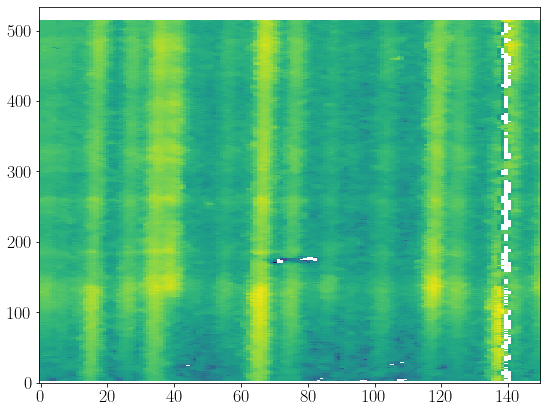

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(np.log(data_set["new_data_offset"][93,:,1160:1310]),aspect = "auto",origin="lower")
ax.set_xlabel(r'',fontsize=24)
ax.set_ylabel(r'',fontsize=24)
ax.tick_params(labelsize=18)
plt.subplots_adjust(bottom = 0.1,left=0.1,top=0.97,right=0.97)

In [37]:
data_set["new_data_offset"][93,94,1178]

0.30519998

In [4]:
#pixel2sec = 512.0/534.0
pixel_tot = 534
pixel_cen = 256 + 19
disk_slit_cen = -842.0
limb_slit_cen = -1242.0
r_disk = (np.linspace(534,1,534) - (pixel_cen+842))/data_set["rsun"]

limb_top = limb_slit_cen + (pixel_tot - pixel_cen - 1)
disk_bot = disk_slit_cen - pixel_cen 
overlap_len = limb_top - disk_bot
pixel_overlap = np.arange(disk_bot,limb_top,1.0)
print(limb_top - disk_slit_cen)
print(pixel_overlap)

-142.0
[-1117. -1116. -1115. -1114. -1113. -1112. -1111. -1110. -1109. -1108.
 -1107. -1106. -1105. -1104. -1103. -1102. -1101. -1100. -1099. -1098.
 -1097. -1096. -1095. -1094. -1093. -1092. -1091. -1090. -1089. -1088.
 -1087. -1086. -1085. -1084. -1083. -1082. -1081. -1080. -1079. -1078.
 -1077. -1076. -1075. -1074. -1073. -1072. -1071. -1070. -1069. -1068.
 -1067. -1066. -1065. -1064. -1063. -1062. -1061. -1060. -1059. -1058.
 -1057. -1056. -1055. -1054. -1053. -1052. -1051. -1050. -1049. -1048.
 -1047. -1046. -1045. -1044. -1043. -1042. -1041. -1040. -1039. -1038.
 -1037. -1036. -1035. -1034. -1033. -1032. -1031. -1030. -1029. -1028.
 -1027. -1026. -1025. -1024. -1023. -1022. -1021. -1020. -1019. -1018.
 -1017. -1016. -1015. -1014. -1013. -1012. -1011. -1010. -1009. -1008.
 -1007. -1006. -1005. -1004. -1003. -1002. -1001. -1000.  -999.  -998.
  -997.  -996.  -995.  -994.  -993.  -992.  -991.  -990.  -989.  -988.
  -987.  -986.  -985.]


In [5]:
data_mask = np.where(data_set["new_data_offset"]>-1.e6,1,0)
data_mask_disk = data_mask[[0,1,2,59,60,61,93,94,95],:,:]
data_mask_limb = data_mask[np.r_[3:59,62:93,96:152],:,:]

In [6]:
data_disk = data_set["new_data_offset"][[0,1,2,59,60,61,93,94,95],:,:]
data_limb = data_set["new_data_offset"][np.r_[3:5,6:14,15:18,19:22,23:59,62:64,65:93,96:152],:,:]

In [ ]:
print(data_limb)

In [7]:
data_overlap = (np.sum(data_disk[:,22:112,:],axis = (0,1)) + np.sum(data_limb[:,422:512,:],axis = (0,1)))/ \
(np.sum(data_mask_disk[:,22:112,:],axis = (0,1)) + np.sum(data_mask_limb[:,400:512,:],axis = (0,1)))

data_overlap_err = np.sqrt(data_overlap*600.0)/np.sqrt(152.0)/600.0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
print(data_overlap_err)

In [ ]:
data_overlap_dict = {'wvl':data_set["wvl"],
                    'int':data_overlap,
                    'err':data_overlap_err}
data_overlap_set = pd.DataFrame(data_overlap_dict) 
data_overlap_set.to_csv("../save/int_overlap_avg.csv")

In [8]:
old_line_list = pd.read_csv('/Users/yjzhu/Desktop/Solar/CHIANTI_toy/list_veri.csv',skiprows=0)
print(old_line_list.shape)

(371, 9)


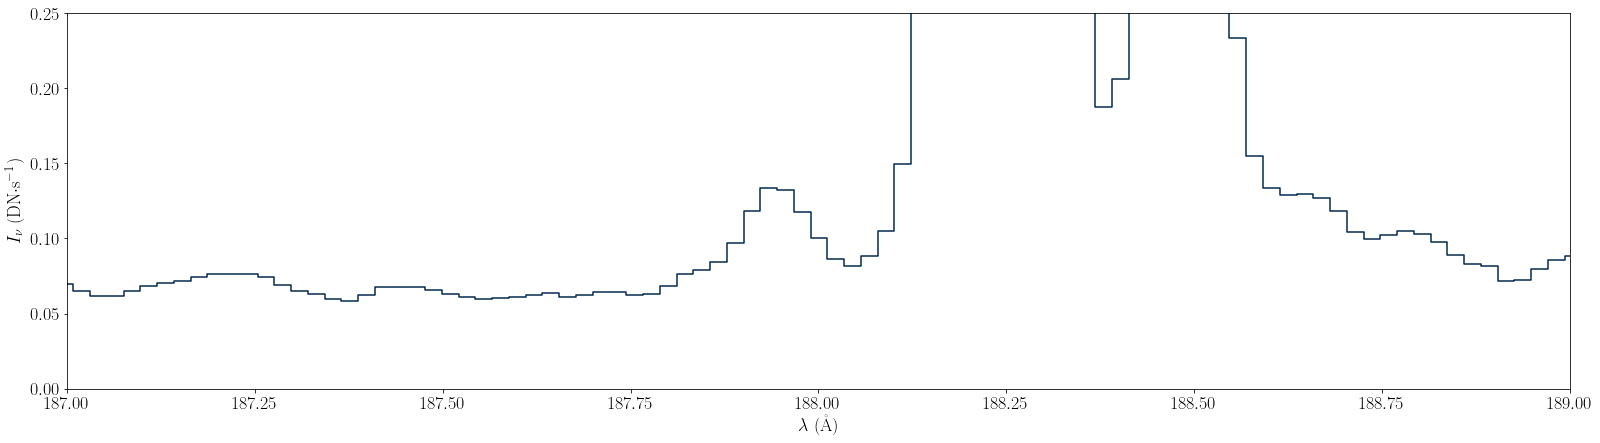

In [10]:
wvl_range = (187,189)
height_list = (0.01, 0.03)
plot_old_list = False
old_line_list_plot = old_line_list.loc[(old_line_list["wavelength_ch"] > wvl_range[0]) & (old_line_list["wavelength_ch"] < wvl_range[1])]
wvl_line_plot = (old_line_list_plot["wavelength_ch"].values)
ion_name = (old_line_list_plot["ion"].values)
fig, ax = plt.subplots(figsize=(24,6))
ln, = ax.step(data_set["wvl"],data_overlap,color = "#00274C",linewidth=1.5,label = '')
ax.set_xlabel(r'$\lambda$ (\mbox{\AA})',fontsize=18)
ax.set_ylabel(r'$I_\nu$ (DN$\cdot \mathrm{s}^{-1}$)',fontsize=18)
ax.set_xlim(wvl_range)
ax.set_ylim((0,0.25))
ax.tick_params(labelsize=18)

if plot_old_list:
    for ii in range(0,old_line_list_plot.shape[0]):
        ax.axvline(wvl_line_plot[ii],ls="--",lw=1,color = "#FFCB05")
        ax.text(wvl_line_plot[ii],height_list[ii%2],ion_name[ii],fontsize=16)
plt.subplots_adjust(bottom = 0.1,left=0.1,top=0.97,right=0.97)

In [93]:
calib_eis = scipy.io.readsav('../save/dn_to_phot.save',verbose = True,python_dict=True)
from scipy import interpolate
f_1 = interpolate.interp1d(calib_eis["wvl_1"],calib_eis["conv_erg_1"])
f_2 = interpolate.interp1d(calib_eis["wvl_2"],calib_eis["conv_erg_2"])

--------------------------------------------------
Date: Wed Oct  1 06:36:50 2008
User: landi
Host: poppeo
--------------------------------------------------
Format: 9
Architecture: x86
Operating System: linux
IDL Version: 6.2
--------------------------------------------------
Successfully read 11 records of which:
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 7 are of type VARIABLE
--------------------------------------------------
Available variables:
 - wvl_1 [<class 'numpy.ndarray'>]
 - wvl_2 [<class 'numpy.ndarray'>]
 - conv_erg_1 [<class 'numpy.ndarray'>]
 - conv_phot_1 [<class 'numpy.ndarray'>]
 - conv_erg_2 [<class 'numpy.ndarray'>]
 - conv_phot_2 [<class 'numpy.ndarray'>]
 - readme [<class 'bytes'>]
--------------------------------------------------


In [95]:
wvl_b = data_set["wvl"][:2048]
wvl_r = data_set["wvl"][2048:]
int_b = data_overlap[:2048]*f_1(wvl_b)
int_r = data_overlap[2048:]*f_2(wvl_r)
err_b = data_overlap_err[:2048]*f_1(wvl_b)
err_r = data_overlap_err[2048:]*f_2(wvl_r)

In [96]:
data_erg = np.concatenate((int_b,int_r))
data_erg_err = np.concatenate((err_b,err_r))

data_erg_dict = {'wvl':data_set["wvl"],
                    'int':data_erg,
                    'err':data_erg_err}
data_erg_set = pd.DataFrame(data_erg_dict) 
data_erg_set.to_csv("../save/int_erg_avg.csv")


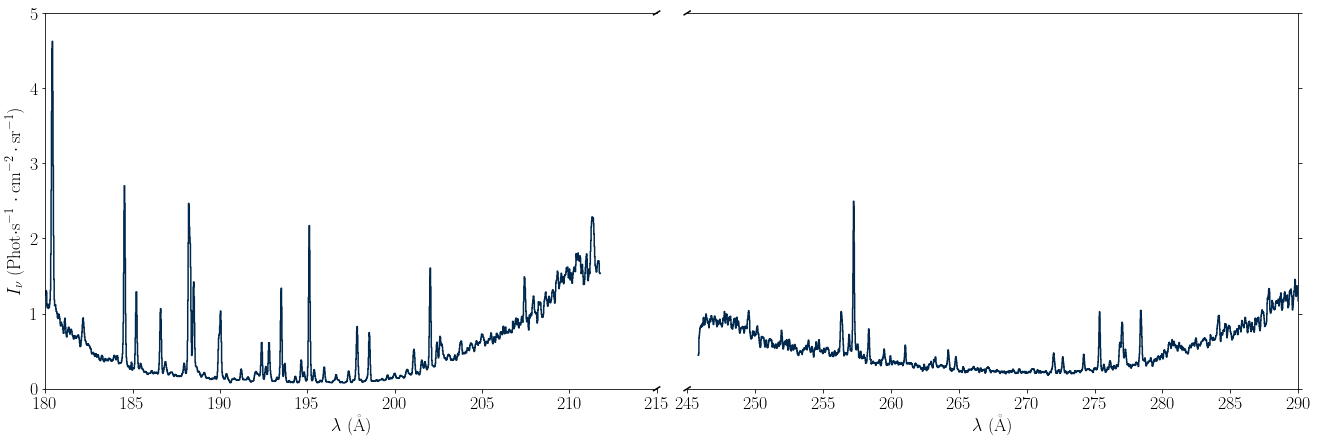

In [92]:
wvl_b = data_set["wvl"][:2048]
wvl_r = data_set["wvl"][2048:]
int_b = data_overlap[:2048]*f_1(wvl_b)
int_r = data_overlap[2048:]*f_2(wvl_r)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(20,6))
ax1.set_xlim((180,215))
ax2.set_xlim((245,290))
ax1.step(wvl_b,int_b,color = "#00274C",linewidth=1.5,label = '')
ax2.step(wvl_r,int_r,color = "#00274C",linewidth=1.5,label = '')
ax1.set_xlabel(r'$\lambda$ (\mbox{\AA})',fontsize=18)
ax2.set_xlabel(r'$\lambda$ (\mbox{\AA})',fontsize=18)
ax1.set_ylabel(r'$I_\nu$ (Phot$\cdot \mathrm{s}^{-1} \cdot \mathrm{cm}^{-2} \cdot \mathrm{sr}^{-1}$)',fontsize=18)
ax1.set_ylim((0,5))
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
#ax1.tick_params(labelright='off')
ax2.yaxis.tick_right()
# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .005 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)
plt.subplots_adjust(bottom = 0.1,left=0.1,top=0.97,right=0.97,wspace=0.05)
plt.savefig(fname = '../figs/test_calib_1.png', dpi = 300, format = 'png')

In [72]:
np.where(data_set["wvl"] < 220)

(array([   0,    1,    2, ..., 2045, 2046, 2047]),)

In [ ]:
wvl_test = data_set["wvl"][815:837]
int_test = data_overlap[815:837]

In [45]:
from astropy.modeling import models, fitting, Fittable1DModel, Parameter

class myGaussian1D(Fittable1DModel):
    amplitude = Parameter()
    mean = Parameter()
    stddev = Parameter()
    bg = Parameter()

    @staticmethod
    def evaluate(x, amplitude, mean, stddev,bg):
        return amplitude * np.exp((-(1 / (2. * stddev**2)) * (x - mean)**2)) + bg

    @staticmethod
    def fit_deriv(x, amplitude, mean, stddev,bg):
        d_amplitude = np.exp((-(1 / (stddev**2)) * (x - mean)**2))
        d_mean = (2 * amplitude *
                  np.exp((-(1 / (stddev**2)) * (x - mean)**2)) *
                  (x - mean) / (stddev**2))
        d_stddev = (2 * amplitude *
                    np.exp((-(1 / (stddev**2)) * (x - mean)**2)) *
                    ((x - mean)**2) / (stddev**3))
        return [d_amplitude, d_mean, d_stddev,np.ones_like(d_amplitude)]

class myVoigt1D(Fittable1DModel):
    """
    One dimensional model for the Voigt profile.

    Parameters
    ----------
    x_0 : float
        Position of the peak
    amplitude_L : float
        The Lorentzian amplitude
    fwhm_L : float
        The Lorentzian full width at half maximum
    fwhm_G : float
        The Gaussian full width at half maximum

    See Also
    --------
    Gaussian1D, Lorentz1D

    Notes
    -----
    Algorithm for the computation taken from
    McLean, A. B., Mitchell, C. E. J. & Swanston, D. M. Implementation of an
    efficient analytical approximation to the Voigt function for photoemission
    lineshape analysis. Journal of Electron Spectroscopy and Related Phenomena
    69, 125-132 (1994)

    Examples
    --------
    .. plot::
        :include-source:

        import numpy as np
        from astropy.modeling.models import Voigt1D
        import matplotlib.pyplot as plt

        plt.figure()
        x = np.arange(0, 10, 0.01)
        v1 = Voigt1D(x_0=5, amplitude_L=10, fwhm_L=0.5, fwhm_G=0.9)
        plt.plot(x, v1(x))
        plt.show()
    """

    x_0 = Parameter(default=0)
    amplitude_L = Parameter(default=1)
    fwhm_L = Parameter(default=2/np.pi)
    fwhm_G = Parameter(default=np.log(2))
    bg = Parameter()

    _abcd = np.array([
        [-1.2150, -1.3509, -1.2150, -1.3509],  # A
        [1.2359, 0.3786, -1.2359, -0.3786],    # B
        [-0.3085, 0.5906, -0.3085, 0.5906],    # C
        [0.0210, -1.1858, -0.0210, 1.1858]])   # D

    @classmethod
    def evaluate(cls, x, x_0, amplitude_L, fwhm_L, fwhm_G,bg):

        A, B, C, D = cls._abcd
        sqrt_ln2 = np.sqrt(np.log(2))
        X = (x - x_0) * 2 * sqrt_ln2 / fwhm_G
        X = np.atleast_1d(X)[..., np.newaxis]
        Y = fwhm_L * sqrt_ln2 / fwhm_G
        Y = np.atleast_1d(Y)[..., np.newaxis]

        V = np.sum((C * (Y - A) + D * (X - B))/(((Y - A) ** 2 + (X - B) ** 2)), axis=-1)

        return (fwhm_L * amplitude_L * np.sqrt(np.pi) * sqrt_ln2 / fwhm_G) * V + bg

    @classmethod
    def fit_deriv(cls, x, x_0, amplitude_L, fwhm_L, fwhm_G,bg):

        A, B, C, D = cls._abcd
        sqrt_ln2 = np.sqrt(np.log(2))
        X = (x - x_0) * 2 * sqrt_ln2 / fwhm_G
        X = np.atleast_1d(X)[:, np.newaxis]
        Y = fwhm_L * sqrt_ln2 / fwhm_G
        Y = np.atleast_1d(Y)[:, np.newaxis]
        constant = fwhm_L * amplitude_L * np.sqrt(np.pi) * sqrt_ln2 / fwhm_G

        alpha = C * (Y - A) + D * (X - B)
        beta = (Y - A) ** 2 + (X - B) ** 2
        V = np.sum((alpha / beta), axis=-1)
        dVdx = np.sum((D/beta - 2 * (X - B) * alpha / np.square(beta)), axis=-1)
        dVdy = np.sum((C/beta - 2 * (Y - A) * alpha / np.square(beta)), axis=-1)

        dyda = [-constant * dVdx * 2 * sqrt_ln2 / fwhm_G,
                constant * V / amplitude_L,
                constant * (V / fwhm_L + dVdy * sqrt_ln2 / fwhm_G),
                -constant * (V + (sqrt_ln2 / fwhm_G) * (2 * (x - x_0) * dVdx + fwhm_L * dVdy)) / fwhm_G,
               np.ones_like(-constant * dVdx * 2 * sqrt_ln2 / fwhm_G)]
        return dyda


    @property
    def input_units(self):
        if self.x_0.unit is None:
            return None
        else:
            return {'x': self.x_0.unit}

    def _parameter_units_for_data_units(self, inputs_unit, outputs_unit):
        return OrderedDict([('x_0', inputs_unit['x']),
                            ('fwhm_L', inputs_unit['x']),
                            ('fwhm_G', inputs_unit['x']),
                            ('amplitude_L', outputs_unit['y'])])

    
    

g_init = myGaussian1D(amplitude=0.8, mean=184.5, stddev=0.1,bg=0.06)
v_init = myVoigt1D(x_0=184.5, amplitude_L=0.8, fwhm_L=0.01, fwhm_G=0.1,bg=0.06)

fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, wvl_test, int_test)

fit_v = fitting.LevMarLSQFitter()
v = fit_v(v_init, wvl_test, int_test -g.bg)


In [46]:
v

<myVoigt1D(x_0=184.53670857, amplitude_L=1.51017648, fwhm_L=0.02098713, fwhm_G=0.08347545, bg=-0.00804596)>

In [47]:
g

<myGaussian1D(amplitude=0.43826532, mean=184.536705, stddev=0.04048598, bg=0.06382416)>

In [49]:
2.355*g.stddev

0.09534448551905741

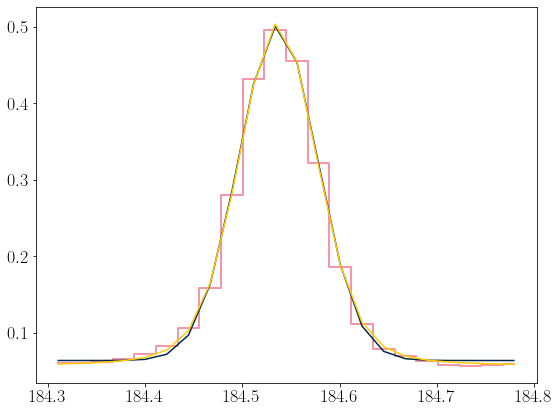

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
ln, = ax.step(wvl_test,int_test,color = '#F596AA',linewidth=2,label = '',where="mid")
ax.plot(wvl_test,g(wvl_test),color="#00274C")
ax.plot(wvl_test,v(wvl_test)+g.bg,color="#FFCB05")
ax.set_xlabel(r'',fontsize=24)
ax.set_ylabel(r'',fontsize=24)
ax.tick_params(labelsize=18)
plt.subplots_adjust(bottom = 0.1,left=0.1,top=0.97,right=0.97)